<a href="https://colab.research.google.com/github/thatpeacegirl/Outlier-Detection/blob/main/Detecting_Outliers_HNG_Task_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from scipy.spatial import cKDTree
import numpy as np

In [ ]:
data = pd.read_csv('/content/Anambra_minimized.csv')

In [ ]:
data.shape[0]

3679

In [ ]:
data.duplicated().sum()

0

In [ ]:
# Use cKD-Tree for spatial analysis as datset is large
points = data[['Longitude', 'Latitude']].values
ckdtree = cKDTree(points)

In [ ]:
# Define radius (in km) for neighbour search. Selected 1km
# Convert 1km boundary radius to degree of latitude (or longitude)
# 1 degree latitude ~ 111 km
radius = 1.0 / 111.0

In [ ]:
data.columns

Index(['LGA', 'Ward', 'PU-Code', 'PU-Name', 'Latitude', 'Longitude', 'APC',
       'LP', 'PDP', 'NNPP'],
      dtype='object')

In [ ]:
data['LGA'].unique()

array(['AGUATA', 'AYAMELUM', 'ANAMBRA EAST', 'ANAMBRA WEST', 'ANAOCHA',
       'AWKA NORTH', 'AWKA SOUTH', 'DUNUKOFIA', 'EKWUSIGO',
       'IDEMILI NORTH', 'IDEMILI-SOUTH', 'IHALA', 'NJIKOKA',
       'NNEWI NORTH', 'NNEWI SOUTH', 'OGBARU', 'ONITSHA-NORTH',
       'ONITSHA -SOUTH', 'ORUMBA NORTH', 'ORUMBA  SOUTH', 'OYI'],
      dtype=object)

In [ ]:
len(data['LGA'].unique())

21

In [ ]:
len(data['Ward'].unique())

296

In [ ]:
# Empty list to store outlier information
outliers = []

# Loop through each location in the dataframe
for index, location in data.iterrows():
    # Query the cKD-Tree to find neighbours of that location within the set radius
    neighbors = ckdtree.query_ball_point([location['Longitude'], location['Latitude']], radius)
      # Remove self from neighbors
    neighbors.remove(index)

    # Calculate mean votes for each party among the location's neighbors
    mean_votes = {}
    for party in ['APC', 'LP', 'PDP', 'NNPP']:
        mean_votes[party] = np.mean(data.loc[neighbors, party])

    # Calculate outlier scores
    outlier_score = {}
    for party in mean_votes:
        outlier_score[party] = abs(location[party] - mean_votes[party])

    # Append relevant information to outliers list
    outliers.append({
        'index': index,
        'lga': location['LGA'],
        'ward': location['Ward'],
        'PU-Name': location['PU-Name'],
        'polling_unit_code': location['PU-Code'],
        'longitude': location['Longitude'],
        'latitude': location['Latitude'],
        'APC_Votes': location['APC'],
        'LP_Votes': location['LP'],
        'PDP_Votes': location['PDP'],
        'NNPP_Votes': location['NNPP'],
        'APC_outlier_score': outlier_score['APC'],
        'LP_outlier_score': outlier_score['LP'],
        'PDP_outlier_score': outlier_score['PDP'],
        'NNPP_outlier_score': outlier_score['NNPP'],
        'Neighbours': neighbors
    })

# Store outlier information in a new dataframe to convert to a CSV file
outliers_df = pd.DataFrame(outliers)

In [ ]:
outliers_df

,index,lga,ward,PU-Name,polling_unit_code,longitude,latitude,APC_Votes,LP_Votes,PDP_Votes,NNPP_Votes,APC_outlier_score,LP_outlier_score,PDP_outlier_score,NNPP_outlier_score,Neighbours
0,0,AGUATA,ACHINA I,ST. CHARLE'S SCHOOL,04-01-01-001,7.100949,6.008584,0,0,0,0,1.216667,99.683333,3.120833,0.604167,"[46, 2967, 219, 47, 44, 45, 218, 214, 215, 294..."
1,1,AGUATA,ACHINA I,AMANKWU SQUARE,04-01-01-005,7.100949,6.008584,3,142,0,1,1.795833,42.908333,3.120833,0.400000,"[46, 2967, 219, 47, 44, 45, 218, 214, 215, 294..."
2,2,AGUATA,ACHINA I,COOPERATIVE HALL,04-01-01-006,7.100949,6.008584,0,0,0,0,1.216667,99.683333,3.120833,0.604167,"[46, 2967, 219, 47, 44, 45, 218, 214, 215, 294..."
3,3,AGUATA,ACHINA I,OCHIEOBU SQUARE,04-01-01-008,7.100949,6.008584,0,124,4,1,1.216667,24.833333,0.895833,0.400000,"[46, 2967, 219, 47, 44, 45, 218, 214, 215, 294..."
4,4,AGUATA,ACHINA I,OYE MOTOR PARK II,04-01-01-010,7.119106,5.965620,4,57,0,0,4.000000,41.000000,1.000000,0.000000,[5]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3674,3674,AWKA SOUTH,OKPUNO,NODU VILLAGE HALL VII (OPEN SPACE OPPOSITE NOD...,04-07-19-028,7.070117,6.232450,0,51,0,0,0.285714,57.428571,0.857143,0.142857,"[3670, 3673, 3671, 1148, 3672, 3047, 3230]"
3675,3675,AWKA SOUTH,OKPUNO,NIGERIA UNION OF JOURNALISTS PREMISES (OPEN SP...,04-07-19-029,7.067749,6.206956,2,95,0,0,0.748031,26.598425,2.755906,0.307087,"[1132, 1131, 3628, 3629, 3630, 1017, 1018, 101..."
3676,3676,AWKA SOUTH,OKPUNO,OKOCHI VILLAGE HALL II,04-07-19-030,7.109021,6.237463,0,0,0,0,1.125000,147.125000,3.500000,0.625000,"[1154, 3063, 1084, 1085, 1086, 3632, 1087, 1149]"
3677,3677,NNEWI SOUTH,AMICHI II,UMUNNACHI EBENATO UDENE VILL. HALL,04-15-03-013,6.987530,5.935036,1,13,0,1,0.600000,79.400000,0.800000,1.000000,"[2835, 2832, 1911, 1984, 1985]"


In [ ]:
outliers_df.isnull().sum()

index                  0
lga                    0
ward                   0
PU-Name                0
polling_unit_code      0
longitude              0
latitude               0
APC_Votes              0
LP_Votes               0
PDP_Votes              0
NNPP_Votes             0
APC_outlier_score     91
LP_outlier_score      91
PDP_outlier_score     91
NNPP_outlier_score    91
Neighbours             0
dtype: int64

In [ ]:
outliers_df.dropna(subset=['APC_outlier_score'], inplace=True)

In [ ]:
outliers_df.isnull().sum()

index                 0
lga                   0
ward                  0
PU-Name               0
polling_unit_code     0
longitude             0
latitude              0
APC_Votes             0
LP_Votes              0
PDP_Votes             0
NNPP_Votes            0
APC_outlier_score     0
LP_outlier_score      0
PDP_outlier_score     0
NNPP_outlier_score    0
Neighbours            0
dtype: int64

This shows all null values in the empty columns are on the same rows

In [ ]:
top_3_APC = outliers_df[['polling_unit_code', 'PU-Name', 'lga', 'ward', 'APC_outlier_score', 'Neighbours']].sort_values(by='APC_outlier_score', ascending=False).head(3)
top_3_APC

,polling_unit_code,PU-Name,lga,ward,APC_outlier_score,Neighbours
1975,04-15-10-003,AKABO HALL I,NNEWI SOUTH,EZINIFITE III,349.281250,"[1923, 1988, 1989, 1990, 1991, 1993, 1994, 199..."
992,04-07-06-011,NKWO AMENYI SQUARE II,AWKA SOUTH,AWKA II,227.210526,"[3675, 3634, 3107, 1006, 3111, 3653, 3112, 310..."
1167,04-08-01-006,AKWA VILLAGE HALL III,DUNUKOFIA,AKWA,145.974576,"[1239, 1055, 3135, 1271, 1228, 1227, 1226, 122..."


In [ ]:
top_3_PDP = outliers_df[['polling_unit_code', 'PU-Name', 'lga', 'ward', 'PDP_outlier_score', 'Neighbours']].sort_values(by='PDP_outlier_score', ascending=False).head(3)
top_3_PDP

,polling_unit_code,PU-Name,lga,ward,PDP_outlier_score,Neighbours
912,04-06-11-007,AMAMKPU V HALL,AWKA NORTH,MGBAKWU I (ANEZIKE),461.594203,"[864, 865, 850, 3050, 918, 3049, 925, 3046, 92..."
2419,04-18-11-003,PIONEER PRY. SCHOOL III,ONITSHA -SOUTH,ODOAKPU I,289.338235,"[3536, 3537, 3528, 2414, 3532, 3535, 3534, 346..."
58,04-01-06-007,AMAUDO UMUOWELE,AGUATA,EKWULOBIA I,198.500000,"[57, 56]"


In [ ]:
top_3_LP = outliers_df[['polling_unit_code', 'PU-Name', 'lga', 'ward', 'LP_outlier_score', 'Neighbours']].sort_values(by='LP_outlier_score', ascending=False).head(3)
top_3_LP

,polling_unit_code,PU-Name,lga,ward,LP_outlier_score,Neighbours
300,04-03-03-005,AMA-OKPOGBA,ANAMBRA EAST,ENUGWU-OTU,459.450777,"[358, 387, 386, 385, 384, 383, 382, 381, 380, ..."
1148,04-07-19-010,NODU VILLAGE HALL II,AWKA SOUTH,OKPUNO,456.857143,"[3670, 3673, 3671, 3674, 3672, 3047, 3230]"
298,04-03-03-003,AMA-ENUGU II,ANAMBRA EAST,ENUGWU-OTU,442.362694,"[358, 387, 386, 385, 384, 383, 382, 381, 380, ..."


In [ ]:
top_3_NNPP = outliers_df[['polling_unit_code', 'PU-Name', 'lga', 'ward', 'NNPP_outlier_score', 'Neighbours']].sort_values(by='NNPP_outlier_score', ascending=False).head(3)
top_3_NNPP

,polling_unit_code,PU-Name,lga,ward,NNPP_outlier_score,Neighbours
1869,04-14-09-005,UMUEZEAGU P/S I,NNEWI NORTH,URUAGU II,250.131250,"[3329, 3303, 1754, 1801, 3297, 3296, 3295, 329..."
1213,04-08-06-007,EKWUEME HALL III,DUNUKOFIA,UKPO I,143.669492,"[1239, 1055, 3135, 1271, 1228, 1227, 1226, 122..."
742,04-05-12-006,COMMUNITY PRY. SCHOOL II,ANAOCHA,AKWAEZE,115.587302,"[655, 656, 729, 831, 832, 837, 633, 834, 634, ..."


In [ ]:
outliers_df.loc[729]

index                                                               729
lga                                                             ANAOCHA
ward                                                      AGULU UZOIGBO
PU-Name                                         UDOKAMMA PRY. SCHOOL II
polling_unit_code                                          04-05-11-010
longitude                                                      7.017588
latitude                                                        6.09643
APC_Votes                                                            12
LP_Votes                                                             69
PDP_Votes                                                            48
NNPP_Votes                                                            0
APC_outlier_score                                             11.404762
LP_outlier_score                                              25.039683
PDP_outlier_score                                             46

In [ ]:
# Sort outlier values to determine significant outliers
outliers_df.sort_values(by=['APC_outlier_score', 'LP_outlier_score',  'NNPP_outlier_score', 'PDP_outlier_score'], ascending=False, inplace=True)

In [ ]:
# Convert outliers_df to a Excel file
outliers_df.to_excel('outliers.xlsx', index=False)

### Visualization

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

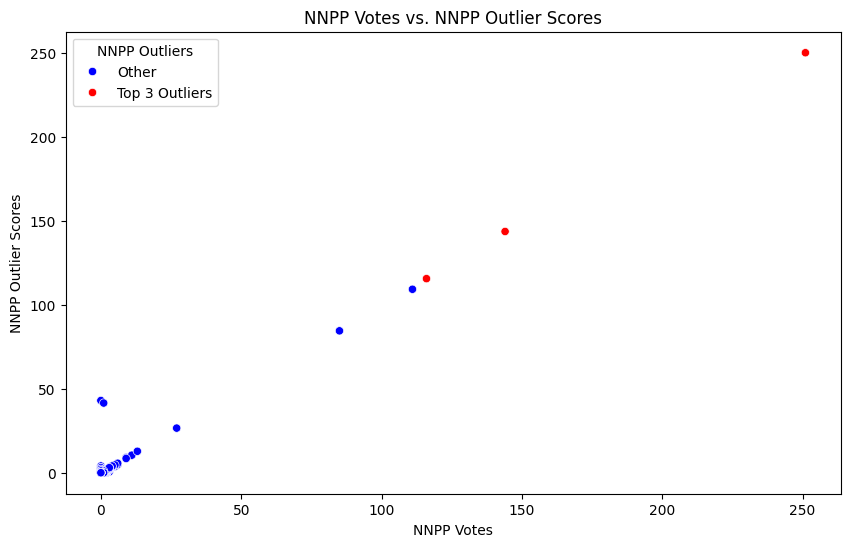

In [ ]:
# Create a new column to mark top three outliers
outliers_df['NNPP Outliers'] = np.where(outliers_df.index.isin(top_3_NNPP.index), 'Top 3 Outliers', 'Other')

# scatter plot of votes vs outlier scores
plt.figure(figsize=(10, 6))
sns.scatterplot(x='NNPP_Votes', y='NNPP_outlier_score', data=outliers_df, hue='NNPP Outliers', palette={'Top 3 Outliers': 'red', 'Other': 'blue'})
plt.title('NNPP Votes vs. NNPP Outlier Scores')
plt.xlabel('NNPP Votes')
plt.ylabel('NNPP Outlier Scores')
plt.show()


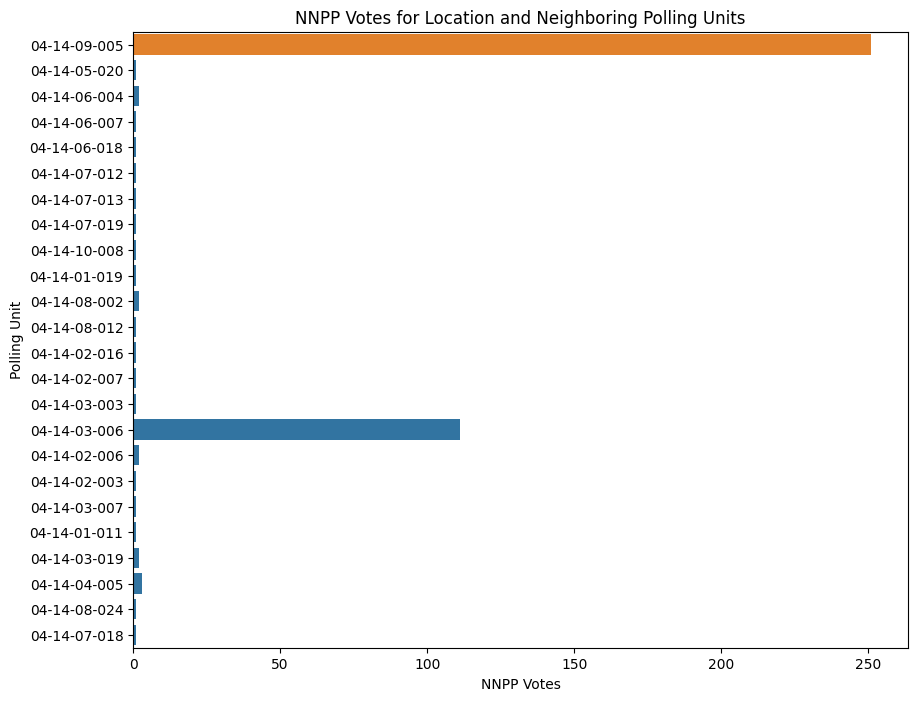

In [ ]:
# Example location index and its neighbors
index_pu = outliers_df.loc[outliers_df['polling_unit_code'] == '04-14-09-005'].index[0]
neighbors_indices = outliers_df.loc[index_pu, 'Neighbours']

# Check if neighbors_indices is a list or a single value
if isinstance(neighbors_indices, list):
    # Get APC votes for the specified location
    location_apc_votes = outliers_df.loc[index_pu, 'NNPP_Votes']

    # Get APC votes for the neighboring locations greater than 10
    neighbors_apc_votes = outliers_df.loc[neighbors_indices, 'NNPP_Votes']
    neighbors_apc_votes = neighbors_apc_votes[neighbors_apc_votes > 0]  # Filter APC votes greater than 10

    # Get Polling Unit names for neighbors with APC votes > 10
    neighbors_names = outliers_df.loc[neighbors_indices, 'polling_unit_code']
    neighbors_names = neighbors_names[neighbors_apc_votes.index]  # Filter neighbors_names based on filtered APC votes

    # Create a DataFrame for plotting
    plot_data = pd.DataFrame({
        'Polling Unit': [outliers_df.loc[index_pu, 'polling_unit_code']] + neighbors_names.tolist(),
        'NNPP Votes': [location_apc_votes] + neighbors_apc_votes.tolist()
    })

    # Plotting
    plt.figure(figsize=(10, 8))
    sns.barplot(y='Polling Unit', x='NNPP Votes', data=plot_data, orient='h', hue=plot_data['Polling Unit'] == '04-14-09-005', legend=False)
    plt.title('NNPP Votes for Location and Neighboring Polling Units')
    plt.ylabel('Polling Unit')
    plt.xlabel('NNPP Votes')
    plt.show()
else:
    print("No neighbors found or neighbors_indices is not in the expected format.")
